# Multiple conformations for RDKit molecules

In [10]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions

In [11]:
import pickle

In [12]:
from rdkit.Chem import PyMol

In [13]:
# ibuH = pickle.load(open('../ibuH.pkl','rb'))
times = 10
smi = "CCCCC[C@H](O)/C=C/[C@@H]1[C@@H](C/C=C\CCCC(O)=O)[C@@H]2C[C@H]1OO2"
ibuH = Chem.MolFromSmiles(smi)
ibuH = Chem.AddHs(ibuH,explicitOnly=False)

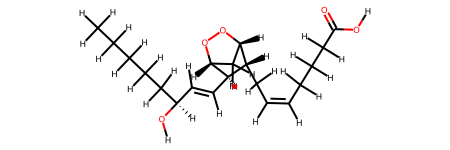

In [14]:
ibuH

Previously we built a single conformation of this molecule. We'd often like to have more than that to start to capture conformational heterogeneity.

In [16]:
cids = AllChem.EmbedMultipleConfs(ibuH, 
                                  clearConfs=True, 
                                  numConfs=times, 
                                  pruneRmsThresh=1)

In [17]:
print (len(cids))

10


In [18]:
for cid in cids: AllChem.MMFFOptimizeMolecule(ibuH,confId=cid)

In [19]:
v= PyMol.MolViewer()

In [20]:
v.DeleteAll()
for cid in cids: 
    v.ShowMol(ibuH,confId=cid,name='Conf-%d'%cid,showOnly=False)

In [21]:
v.server.do('set grid_mode, on')

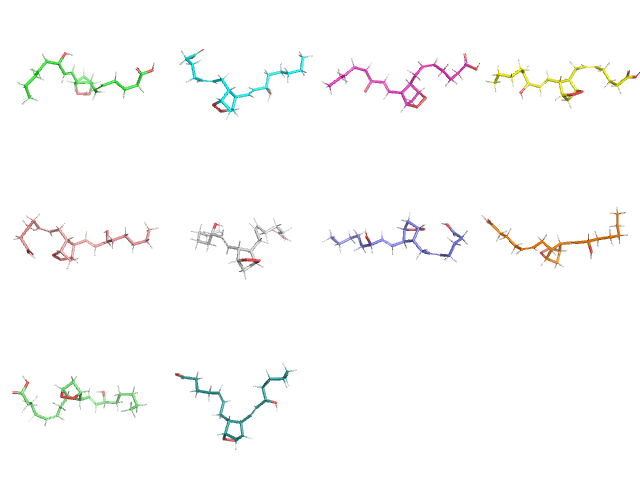

In [22]:
v.server.do('ray')
v.GetPNG()

It's not clear from this picture if we have diverse conformations or are just rotating the molecule in space. We'd like to align of the molecules in order to be able to make this assessment. Specifically, let's choose to align them all, so the benzene rings are overlapping. We can select the benzene ring using an object called a [SMARTS pattern](http://www.daylight.com/dayhtml/doc/theory/theory.smarts.html):

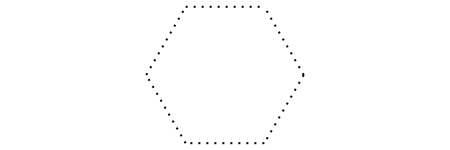

In [23]:
patt = Chem.MolFromSmarts('c1ccccc1');patt #this is just a SMILES string, SMILES are valid SMARTS 

Find which atoms ids in our molecule match the pattern described above:

In [24]:
match = ibuH.GetSubstructMatch(patt)

In [25]:
match

()

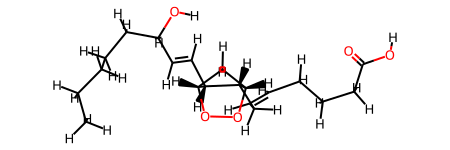

In [26]:
DrawingOptions.includeAtomNumbers=True
ibuH

Now we can align of the conformers on the identified subset of atoms:

In [27]:
AllChem.AlignMolConformers(ibuH,atomIds=match)

And visualize:

In [28]:
v.DeleteAll()
for cid in cids: 
    v.ShowMol(ibuH,confId=cid,name='Conf-%d'%cid,showOnly=False)

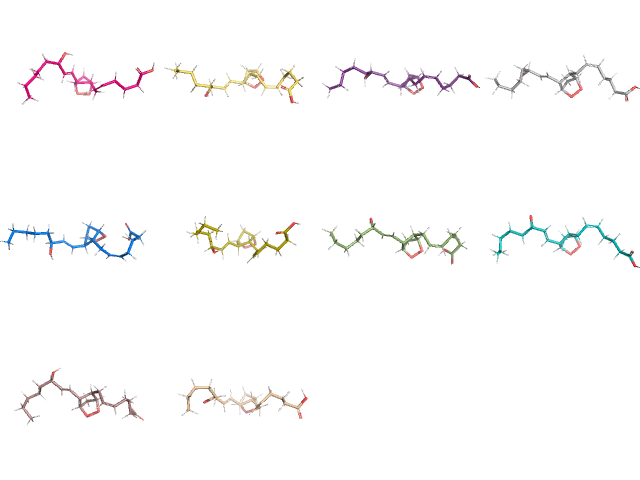

In [29]:
v.server.do('ray')
v.GetPNG()

In [20]:
pickle.dump(ibuH,open('ibuH_confs.pkl','wb'))